In [110]:
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

from sklearn.decomposition import NMF

In [78]:
#update to W
def l1_mult_update(X, W, H): 
    m,n = np.shape(X)
    _,k = np.shape(W)
    
    X_approx = W@H
    res_mat = np.abs(X - X_approx) + 1e-10
    
    #new_W = (W/((W@H@H.transpose())/(res_mat@np.ones(np.shape(H.transpose())))))*((X@H.transpose())/(res_mat@np.ones(np.shape(H.transpose()))))
    new_W = (W/(((W@H)/res_mat)@H.transpose()))*((X/res_mat)@H.transpose())
    
    '''new_W = np.zeros(np.shape(W))
    for s in range(m):
        for t in range(k):
            if res_mat[s,t] == 0:
                print(s,t)
            #new_W[s,t] = W[s,t]*np.sum(X[s,:]/(res_mat[s,:]))/(np.sum(X_approx[s,:]*H[t,:]/(res_mat[s,:]+1e-10))+1e-10)
            denom1 = np.maximum(1e-10,np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            #denom1 = np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
            term2 = np.maximum(1e-10,np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            #term2 = np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
            new_W[s, t] = (W[s, t]/denom1)*(term2)
            #if denom1 < 1e-6:
            #    print ("here")
            #    print ("entry", s, t, "has denom1 = 0.")
            #if term2 < 1e-6:
            #    print ("here")
            #    print ("entry", s, t, "has term2 = 0.")
    '''
            
    return new_W

In [79]:
def l1_mult_updates(X,k,max_iter,W,H):
    m,n = np.shape(X)
    #W = np.random.rand(m,k)
    #H = np.random.rand(k,n)
    
    for t in range(max_iter):
        #print("iteration",t)
        W = l1_mult_update(X,W,H)
        H = l1_mult_update(X.transpose(),H.transpose(),W.transpose()).transpose()
        
    return W,H

In [82]:
X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

print(np.linalg.norm(np.matrix.flatten(X-W@H),1))

W,H = l1_mult_updates(X,k,100,W,H)

print(np.linalg.norm(np.matrix.flatten(X-W@H),1))

195195.47362812082
24443.225544976176


In [85]:
errs = []

X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 100

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(np.matrix.flatten(X-W@H),1))

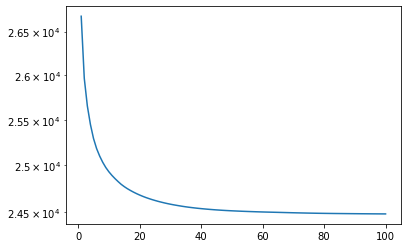

In [86]:
plt.semilogy(range(1,num_iters+1),errs)

In [87]:
errs = []

k = 10
X = np.random.rand(1000,k)@np.random.rand(k,100)

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 100

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(np.matrix.flatten(X-W@H),1))

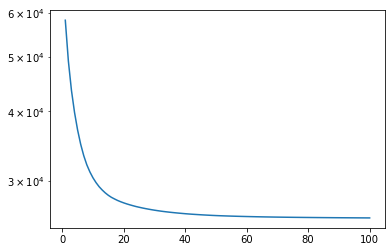

In [88]:
plt.semilogy(range(1,num_iters+1),errs)

## Sanity Checks

In [89]:
errs = []
k = 10
W_opt = np.random.rand(1000,k)
H_opt = np.random.rand(k,100)

X = W_opt@H_opt

init_noise = 1e-10

W = W_opt + init_noise*(np.random.rand(1000,k)<0.1)
H = H_opt + init_noise*(np.random.rand(k,100)<0.1)

#W_opt[2, 5] += .05
#H_opt [5, 25] += .1

num_iters = 200000

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)
    #if denom1 == 1e-10:
     #   print ("entry", s, t, "has denom1 = 0.")
    #if term2 == 1e-10:
     #   print ("entry", s, t, "has term2 = 0.")
        

    errs.append(np.linalg.norm(np.matrix.flatten(X-W@H),1))

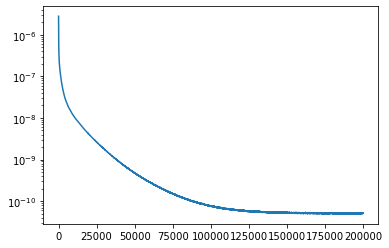

In [90]:
plt.semilogy(range(1,num_iters+1),errs)

## Confirmation of Hand Calculation

In [24]:
x = [0, 1, 1, 0, 3, 4, 6, -1, 0, 1]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
z = 0

for i in np.argwhere(x):
  z += y[i.item()]

print(z)


41


In [52]:
X = np.array([[1, 2, 1], 
              [3, 0, 2], 
              [1, 1, 4]])

W = np.array([[1, 2],
              [0, 1],
              [2, 1]])

H = np.array([[1, 1, 3],
              [0, 2, 2]])

X_approx = W@H
res_mat = np.abs(X - X_approx) + 1e-10
new_W = np.zeros(np.shape(W))
h1 = np.ones(np.shape(H.transpose()))

m = 3
n = 3
k = 2

s = 2
t = 0

for s in range(m):
    for t in range (k):
        denom1 = 0
        term2 = 0
        #for j in np.argwhere(res_mat[s,:]):
        #    denom1 += (X_approx[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        #    term2 += (X[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        denom1 = np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        term2 = np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        new_W[s, t] = (W[s, t]/denom1)*(term2)

print(new_W)


new_W_2 = (W/((W@H@H.transpose())/(res_mat@h1)))*((X@H.transpose())/(res_mat@h1))

new_W_3 = (W/(((W@H)/res_mat)@H.transpose()))*((X/res_mat)@H.transpose())

print(new_W_2)
print(new_W_3)



[[1.         0.58823529]
 [0.         1.        ]
 [0.92857143 0.4       ]]
[[0.22222222 0.5       ]
 [0.         0.5       ]
 [0.93333333 0.41666667]]
[[1.         0.58823529]
 [0.         1.        ]
 [0.92857143 0.4       ]]


In [4]:
X_approx[s,np.argwhere(res_mat[s,:])]

array([[2],
       [4],
       [8]])

In [6]:
np.ones(np.shape(H))

array([[1., 1., 1.],
       [1., 1., 1.]])

# Preliminary Comparison

In [91]:
def mystery_mult_update(X, W2, H2): 
    m,n = np.shape(X)
    _,k = np.shape(W2)
    
    X_approx2 = W2@H2
    res_mat2 = np.abs(X - X_approx2) + 1e-10
    
    new_W2 = (W2/((W2@H2@H2.transpose())/(res_mat2@np.ones(np.shape(H2.transpose())))))*((X@H2.transpose())/(res_mat2@np.ones(np.shape(H2.transpose()))))
    
    return new_W2



def mystery_mult_updates(X,k,max_iter,W2,H2):
    m,n = np.shape(X)
    
    for t in range(max_iter):
        W2 = mystery_mult_update(X,W2,H2)
        H2 = mystery_mult_update(X.transpose(),H2.transpose(),W2.transpose()).transpose()
        
    return W2,H2

In [98]:
errs_l1 = []
errs_lm = []

X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)
W2 = W.copy()
H2 = H.copy()

num_iters = 200

for i in range(num_iters):
    errs_l1.append(np.linalg.norm(np.matrix.flatten(X-W@H),1))
    W,H = l1_mult_updates(X,k,1,W,H)
    
    errs_lm.append(np.linalg.norm(np.matrix.flatten(X-W2@H2),1))
    W2,H2 = mystery_mult_updates(X,k,1,W2,H2)
    

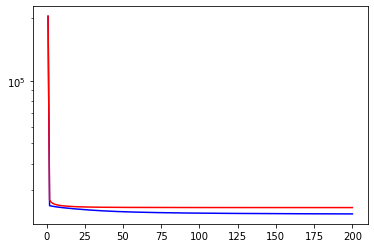

In [99]:
plt.semilogy(range(1,num_iters+1), errs_lm, 'b')
plt.semilogy(range(1,num_iters+1), errs_l1, 'r')

In [108]:
errs_l1 = []
errs_lm = []

k = 10
W_opt = np.random.rand(1000,k)
H_opt = np.random.rand(k,100)

X = W_opt@H_opt

init_noise = 1e-10

W = W_opt + init_noise*(np.random.rand(1000,k)<0.1)
H = H_opt + init_noise*(np.random.rand(k,100)<0.1)
W2 = W.copy()
H2 = H.copy()

num_iters = 1000

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)
    errs_l1.append(np.linalg.norm(np.matrix.flatten(X-W@H),1))
                   
    W2,H2 = mystery_mult_updates(X,k,1,W2,H2)
    errs_lm.append(np.linalg.norm(np.matrix.flatten(X-W2@H2),1))

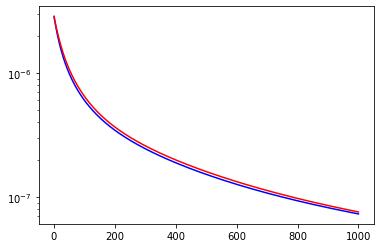

In [109]:
plt.semilogy(range(1,num_iters+1), errs_lm, 'b')
plt.semilogy(range(1,num_iters+1), errs_l1, 'r')

# Robust Example

In [103]:
def f_mult_update(X, W3, H3): 
    m,n = np.shape(X)
    _,k = np.shape(W3)
    
    X_approx3 = W3@H3
    res_mat3 = np.abs(X - X_approx3) + 1e-10
    
    new_W3 = W3*((X@H3.transpose())/(W3@H3@H3.transpose()+1e-10))
    
    return new_W3



def f_mult_updates(X,k,max_iter,W3,H3):
    m,n = np.shape(X)
    
    for t in range(max_iter):
        W3 = f_mult_update(X,W3,H3)
        H3 = f_mult_update(X.transpose(),H3.transpose(),W3.transpose()).transpose()
        
    return W3,H3

In [113]:
errs_l1 = []
errs_lm = []
errs_f = []

X = np.random.rand(1000,100)
k = 10
r = 3

W = np.random.rand(1000,k)
H = np.random.rand(k,100)
W2 = W.copy()
H2 = H.copy()
W3 = W.copy()
H3 = H.copy()
X_errs = X.copy()

columns = np.random.randint(0, 10, r)
rows = np.random.randint(0, 10, r)

for i in range(r):
    X_errs[rows[i], columns[i]] += 100

num_iters = 50

for i in range(num_iters):
    errs_l1.append(np.linalg.norm(np.matrix.flatten(X-W@H),1))
    W,H = l1_mult_updates(X_errs,k,1,W,H)
    
    errs_lm.append(np.linalg.norm(np.matrix.flatten(X-W2@H2),1))
    W2,H2 = mystery_mult_updates(X_errs,k,1,W2,H2)
    
    errs_f.append(np.linalg.norm(np.matrix.flatten(X-W3@H3),1))
    W3,H3 = f_mult_updates(X_errs,k,1,W3,H3)

'entrywise l1 updates in red, frobenius norm updates in green, mystery updates in blue.'

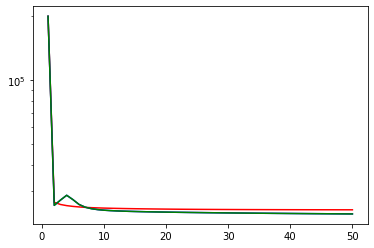

In [114]:
plt.semilogy(range(1,num_iters+1), errs_l1, 'r')
plt.semilogy(range(1,num_iters+1), errs_lm, 'b')
plt.semilogy(range(1,num_iters+1), errs_f, 'g')

'''entrywise l1 updates in red, frobenius norm updates in green, mystery updates in blue.'''

In [ ]:
errs_f = []
errs_sk = []

sklearn.decomposition.NMF()

In [4]:
r = 3
columns = np.random.randint(0, 10, r)
rows = np.random.randint(0, 10, r)

print(rows, columns)

X = np.zeros((10, 10))
Y = X.copy()

for i in range(r):
    Y[rows[i], columns[i]] += 100


print(X)
print(Y)

[6 0 0] [7 0 9]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[100.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
